## Implementación del algoritmo de gradiente descendente para regresión lineal

La regresión lineal simple es un método fundamental en estadística y aprendizaje automático que se utiliza para modelar la relación entre una variable independiente $ x $ y una variable dependiente $ y $. El objetivo es encontrar una línea recta que mejor se ajuste a los datos observados, minimizando la diferencia entre los valores predichos y los valores reales.

Matemáticamente, la relación entre $ x $ e $ y $ se expresa mediante la función lineal:

$
h(x) = \theta_0 + \theta_1 \cdot x
$

Aquí, $ h(x) $ es la predicción de $ y $ dada una entrada $ x $, $ \theta_0 $ es el intercepto de la línea con el eje $ y $ (es decir, el valor de $ h(x) $ cuando $ x = 0 $), y $ \theta_1 $ es la pendiente de la línea, que indica el cambio en $ h(x)$ por cada unidad de cambio en $ x $.

El objetivo de la regresión lineal es determinar los valores óptimos de $ \theta_0 $ y $ \theta_1 $ que minimicen el error entre las predicciones $ h(x) $ y los valores observados de $ y $. 

En el contexto de la regresión lineal simple, la función de costo es una medida que cuantifica el error entre las predicciones realizadas por el modelo y los valores reales observados. La función de costo más comúnmente utilizada es la **función de costo de error cuadrático medio** (MSE, por sus siglas en inglés), que se define como:

$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( h(x^{(i)}) - y^{(i)} \right)^2
$

Donde:

- $ J(\theta_0, \theta_1) $ es la función de costo que queremos minimizar.
- $ m $ es el número de ejemplos en el conjunto de datos.
- $ h(x^{(i)}) $ es la predicción del modelo para el $ i $-ésimo ejemplo, calculada como $ h(x^{(i)}) = \theta_0 + \theta_1 \cdot x^{(i)} $.
- $ y^{(i)} $ es el valor real de la variable dependiente para el $ i $-ésimo ejemplo.
- $ \left( h(x^{(i)}) - y^{(i)} \right)^2 $ es el error cuadrático para el $ i $-ésimo ejemplo.

La función de costo \( J(\theta_0, \theta_1) \) calcula el promedio de los errores al cuadrado para todos los ejemplos del conjunto de datos. El factor $ \frac{1}{2} $ se incluye por conveniencia matemática, ya que simplifica el cálculo del gradiente durante el proceso de optimización.

El objetivo de la regresión lineal es encontrar los valores de $ \theta_0 $ y $ \theta_1 $ que minimicen esta función de costo, es decir, que hagan que las predicciones $ h(x) $ estén lo más cerca posible de los valores reales $ y $. Esto se logra mediante un proceso iterativo como el gradiente descendente, que ajusta los parámetros hasta que la función de costo alcanza su valor mínimo.


### Paso 1: Generar un Conjunto de Datos Sencillo

Primero, generaremos un conjunto de datos simple para ilustrar la regresión lineal.


X:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
Y:  [ 8.52810469  6.10031442  7.55747597 10.3817864   9.93511598  4.54544424
  8.70017684  6.79728558  7.1935623   8.521197    8.28808714 11.20854701
 10.12207545  9.14335003 10.08772647 10.16734865 12.78815815  9.68968347
 11.0261354   8.99180852  5.89402037 12.60723719 13.3288724  10.41566996
 16.73950925  9.59126865 12.89151703 12.7256323  16.46555843 16.63871754
 14.30989485 15.05632504 12.8244285  10.93840706 14.5041757  15.81269794
 18.26058136 18.5047597  15.62534637 16.0953945  14.90289407 14.45996413
 14.18745962 21.80155079 17.18069564 17.6238514  16.29440928 20.65498071
 

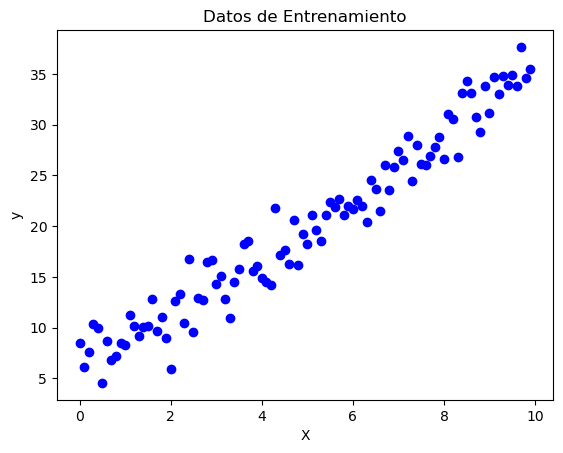

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos artificiales
np.random.seed(0)
X = np.arange(0,10,0.1)  # 100 muestras de una sola característica
y = 5 +  3*X + 2*np.random.randn(X.size)  # h(x) = 5 + 3*x + ruido

print('X: ', X)
print('Y: ', y)

# Visualizar los datos
plt.scatter(X, y, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos de Entrenamiento')
plt.show()


### Paso 2: Inicializar los Parámetros

Inicializamos los parámetros $\theta_0$ y $\theta_1$ con valores iniciales.


In [144]:
# Inicializar parámetros de forma aleatoria
theta_0 = np.random.rand()
theta_1 = np.random.rand()
print('Theta 0: ', theta_0)
print('Theta 1: ', theta_1)

# Definir la tasa de aprendizaje y el número de iteraciones
learning_rate = 0.01
n_iterations = 1000

Theta 0:  0.5699649107012649
Theta 1:  0.5908727612481732


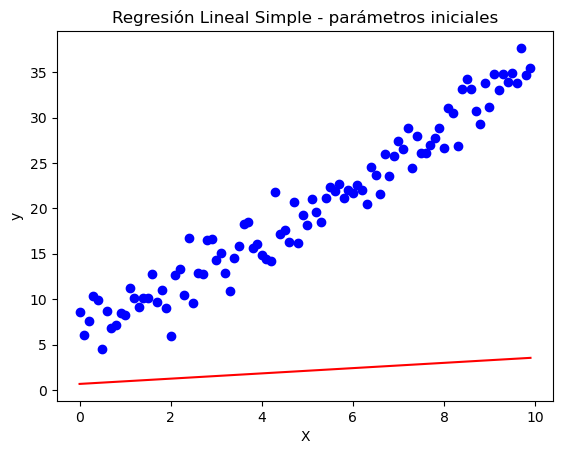

In [84]:
# Visualizar los datos y la línea de regresión con los parámetros iniciales
plt.scatter(X, y, color='blue')
plt.plot(X, theta_0 + theta_1 * X, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal Simple - parámetros iniciales')
plt.show()

### Paso 3: Implementar la Hipótesis y la Función de Costo

La hipótesis $h(x)$ se define como:

$ h(x) = \theta_0 + \theta_1 \cdot x $

La función de costo $J(\theta_0, \theta_1)$ se define como:

$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( h(x^{(i)}) - y^{(i)} \right)^2 $


In [134]:
m = len(y)

def hypothesis(X, theta_0, theta_1):
    h=0
    #su codigo va aqui
    h=theta_0 + theta_1 * X
    return h

def cost_function(X, y, theta_0, theta_1):
    J=0
    #su codigo va aqui
    acc = 0
    
    for i in range(0, m):
        acc += (hypothesis(X[i], theta_0, theta_1) - y[i])**2            

    J = (1 / (2 * m)) * acc
    
    return J

In [96]:
modelo = hypothesis(X, theta_0, theta_1)
print('Vector hipótesis (modelo): ', modelo)
print('Función costo: ', cost_function(X,y,theta_0, theta_1))

Vector hipótesis (modelo):  [0.66017354 0.6891813  0.71818906 0.74719682 0.77620458 0.80521234
 0.8342201  0.86322786 0.89223562 0.92124338 0.95025114 0.97925891
 1.00826667 1.03727443 1.06628219 1.09528995 1.12429771 1.15330547
 1.18231323 1.21132099 1.24032875 1.26933651 1.29834427 1.32735203
 1.35635979 1.38536756 1.41437532 1.44338308 1.47239084 1.5013986
 1.53040636 1.55941412 1.58842188 1.61742964 1.6464374  1.67544516
 1.70445292 1.73346068 1.76246844 1.79147621 1.82048397 1.84949173
 1.87849949 1.90750725 1.93651501 1.96552277 1.99453053 2.02353829
 2.05254605 2.08155381 2.11056157 2.13956933 2.16857709 2.19758486
 2.22659262 2.25560038 2.28460814 2.3136159  2.34262366 2.37163142
 2.40063918 2.42964694 2.4586547  2.48766246 2.51667022 2.54567798
 2.57468575 2.60369351 2.63270127 2.66170903 2.69071679 2.71972455
 2.74873231 2.77774007 2.80674783 2.83575559 2.86476335 2.89377111
 2.92277887 2.95178663 2.9807944  3.00980216 3.03880992 3.06781768
 3.09682544 3.1258332  3.15484096 3



### Paso 4: Implementar el Algoritmo de Gradiente Descendente

El gradiente descendente se actualiza según las siguientes fórmulas:

$
\theta_0 := \theta_0 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h(x^{(i)}) - y^{(i)} \right)
$

$
\theta_1 := \theta_1 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( \left( h(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)} \right)
$


In [146]:
# Listas para almacenar el historial de costos y parámetros
cost_history = []
theta_0_history = []
theta_1_history = []

diferencia = []
diferencia_mult = []

# Algoritmo de gradiente descendente
for _ in range(n_iterations):
    cost_history.append(cost_function(X, y, theta_0, theta_1))
    theta_0_history.append(theta_0)
    theta_1_history.append(theta_1)
    
    # Calcular las predicciones
    hyp = hypothesis(X, theta_0, theta_1)
    dif_theta_0 = learning_rate * (1/m) * np.sum(hyp - y)
    dif_theta_1 = learning_rate * (1/m) * np.sum( (hyp - y) * X) 
    
    # Calcular gradientes
    
    # Actualizar los parámetros
    theta_0 = theta_0 - dif_theta_0
    theta_1 = theta_1 - dif_theta_1
    
    # Almacenar el costo y los parámetros en cada iteración


In [148]:
# Mostrar los parámetros finales
print(f"Parámetros finales: theta_0 = {theta_0}, theta_1 = {theta_1}")

Parámetros finales: theta_0 = 5.050856098400058, theta_1 = 2.9955430907439133



### Paso 5: Visualizar la Evolución de la Función de Costo

Ahora, visualizamos cómo la función de costo disminuye con las iteraciones, lo cual indica que el modelo está convergiendo.

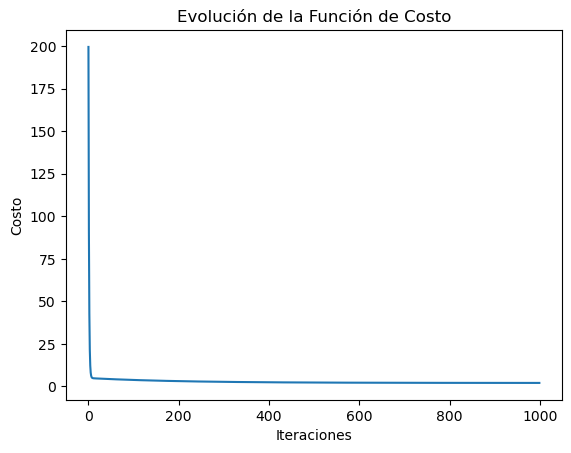

In [138]:
# Visualizar la evolución de la función de costo
plt.plot(cost_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Evolución de la Función de Costo')
plt.show()

### Paso 6: Visualizar la Recta de Ajuste Final

Finalmente, visualizamos la recta de regresión ajustada a los datos.


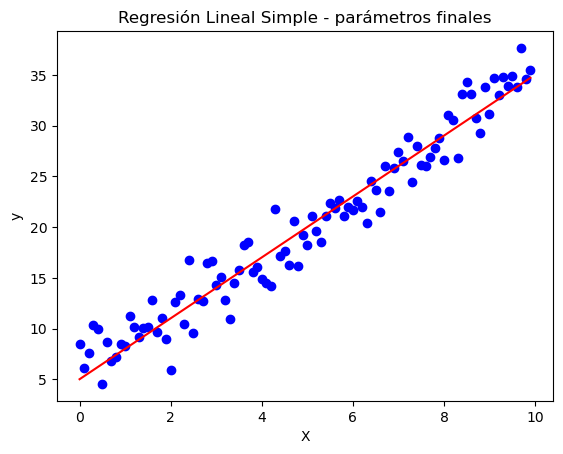

In [27]:
# Visualizar los datos y la línea de regresión
plt.scatter(X, y, color='blue')
plt.plot(X, hypothesis(X, theta_0, theta_1), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal Simple - parámetros finales')
plt.show()